In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv", low_memory=False)

In [176]:
woman_first_marriage = {}

for i in range(2010, 2022):
    woman_first_marriage[i] = df[i][df[i]["아내결혼코드"] == 1]

    #아내 초혼 국내 지역 - 남편 국내 지역
    woman_first_marriage[i] = woman_first_marriage[i][(woman_first_marriage[i]['남편지역코드'] <= 39) & (woman_first_marriage[i]['아내지역코드'] <= 39)]

In [177]:
man_first_marriage = {}

for i in range(2010, 2022):
    man_first_marriage[i] = df[i][df[i]['남편결혼코드'] == 1]

    # 남편 초혼 국내 지역 - 아내 국내 지역
    man_first_marriage[i] = man_first_marriage[i][(man_first_marriage[i]['남편지역코드'] <= 39) & (man_first_marriage[i]['아내지역코드'] <= 39)]

### 장거리 데이터셋

In [178]:
# 수도권(서울, 인천, 경기)
cap = [11, 23, 31]

# 수도권 - 전라도, 경상도, 강원도, 제주도, 대전, 충남, 대구, 울산, 부산 (기준 - 수도권과 지하철로 연결되어 있는가)
remote_area_from_cap = [35, 36, 37, 38, 39, 32, 34, 25, 21, 22, 24, 26] 


# 지역이 다른 케이스

## ------------------------------------------------------------------------------ ##

def getDistanceConditioned(dataframe):
    dataset = {}

    ## 남편 수도권 - 아내 먼 지역

    mCap_fLong = dataframe[(dataframe['남편지역코드'].isin(cap)) & (dataframe['아내지역코드'].isin(remote_area_from_cap))]
    dataset["mCap_fLong"] = mCap_fLong


    ## 아내 수도권 - 남편 먼 지역

    mLong_fCap = dataframe[(dataframe['아내지역코드'].isin(cap)) & (dataframe['남편지역코드'].isin(remote_area_from_cap))]
    dataset["mLong_fCap"] = mLong_fCap

    

    return dataset


### 장거리 혼인 추이

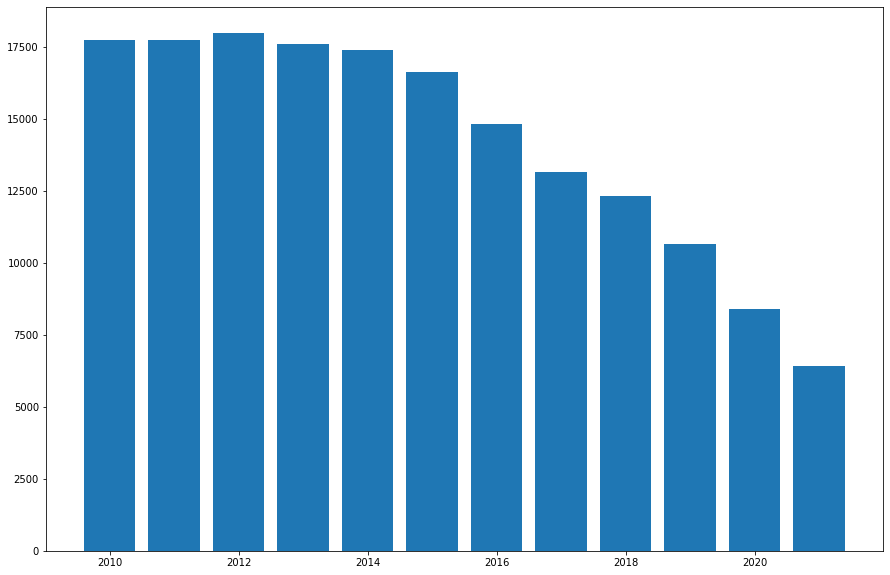

In [179]:
# 1. 남편 초혼

l = []

for i in range(2010, 2022):
    dataset = getDistanceConditioned(man_first_marriage[i])
    new_df = pd.concat([dataset["mCap_fLong"], dataset["mLong_fCap"]])
    l.append(len(new_df))

plt.figure(figsize=(15, 10))
plt.bar(x=range(2010, 2022), height=l)
plt.show()

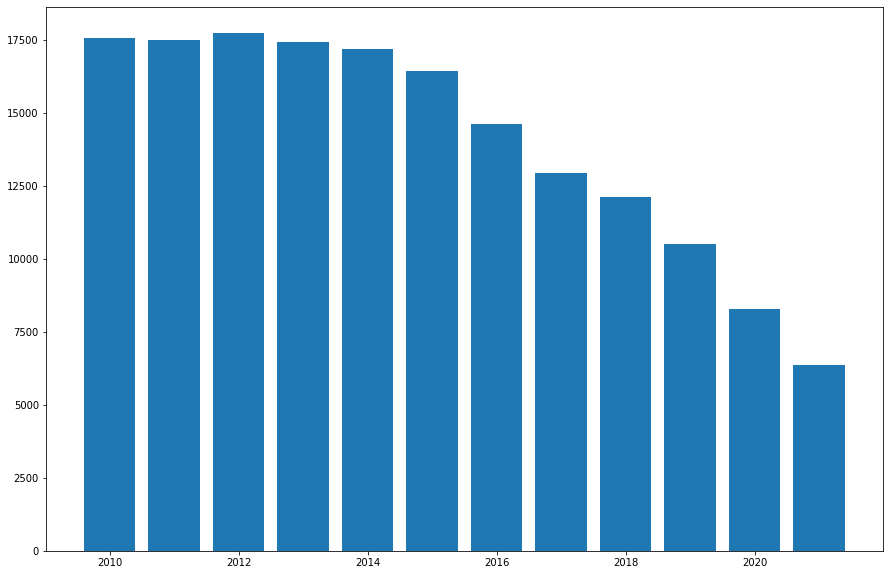

In [180]:
# 2. 아내 초혼

l = []

for i in range(2010, 2022):
    dataset = getDistanceConditioned(woman_first_marriage[i])
    new_df = pd.concat([dataset["mCap_fLong"], dataset["mLong_fCap"]])
    l.append(len(new_df))

plt.figure(figsize=(15, 10))
plt.bar(x=range(2010, 2022), height=l)
plt.show()

### 남녀 연도별 연령 분포

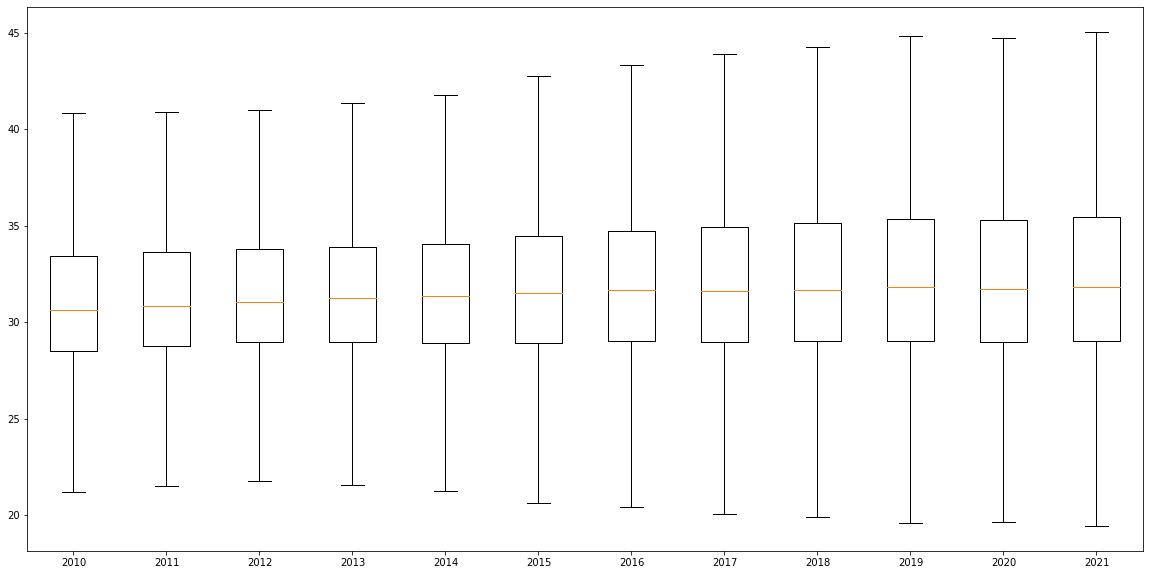

In [181]:
# 1. 남성 초혼

dict_man = []

for i in range(2010, 2022):
    dataset = getDistanceConditioned(man_first_marriage[i])
    new_df = pd.concat([dataset["mCap_fLong"], dataset["mLong_fCap"]])
    dict_man.append(new_df["남편연령"])

fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(dict_man, showfliers=False)
ax.set_xticklabels(range(2010, 2022))

plt.show()

In [182]:
import scipy

year = 2016

dataset = getDistanceConditioned(man_first_marriage[year-1])
new_df = pd.concat([dataset["mCap_fLong"], dataset["mLong_fCap"]])

dataset2 = getDistanceConditioned(man_first_marriage[year])
new_df2 = pd.concat([dataset2["mCap_fLong"], dataset2["mLong_fCap"]])
scipy.stats.ttest_ind(new_df2['남편연령'], new_df['남편연령'], alternative="greater")

# 남성의 경우 2016년 까지는 상승세 -> 이후 뚜렷한 패턴 X

Ttest_indResult(statistic=3.696060884982167, pvalue=0.00010967075968617317)

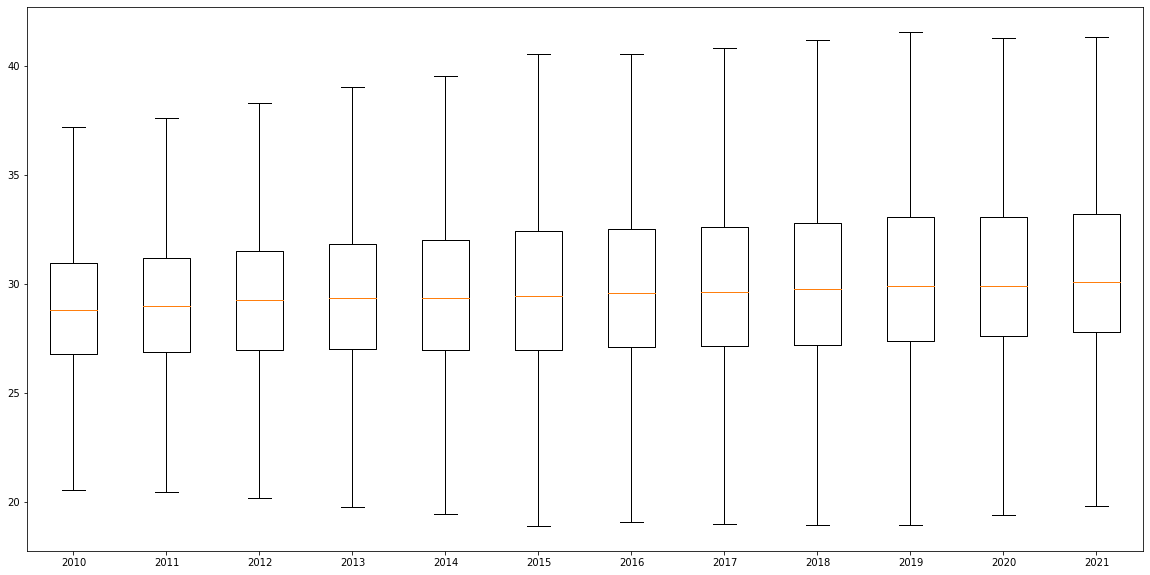

In [183]:
# 2. 여성 초혼

dict_woman = []

for i in range(2010, 2022):
    dataset = getDistanceConditioned(woman_first_marriage[i])
    new_df = pd.concat([dataset["mCap_fLong"], dataset["mLong_fCap"]])
    dict_woman.append(new_df["아내연령"])

fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(dict_woman, showfliers=False)
ax.set_xticklabels(range(2010, 2022))

plt.show()

# 여성의 경우 초혼연령의 뚜렷한 상승세가 보임

In [184]:
import scipy

year = 2020

dataset = getDistanceConditioned(woman_first_marriage[year-1])
new_df = pd.concat([dataset["mCap_fLong"], dataset["mLong_fCap"]])

dataset2 = getDistanceConditioned(woman_first_marriage[year])
new_df2 = pd.concat([dataset2["mCap_fLong"], dataset2["mLong_fCap"]])
scipy.stats.ttest_ind(new_df2['아내연령'], new_df['아내연령'], alternative="greater")

Ttest_indResult(statistic=2.13394470349739, pvalue=0.01643010787699364)

### 남성 수도권 외 지역 - 직업 분포

<AxesSubplot:xlabel='남편직업코드,남편직업코드'>

c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.p

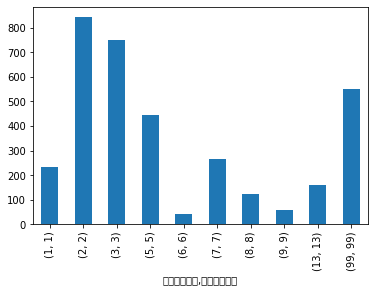

In [185]:
dataset = getDistanceConditioned(man_first_marriage[2021])
mLong_fCap = dataset["mLong_fCap"]

mLong_fCap.groupby("남편직업코드")['남편직업코드'].value_counts().plot.bar()

# 2010, 2011 -> 사무직 > 전문직
# 2012 ~ 전문직 수 제일 높음

<AxesSubplot:>

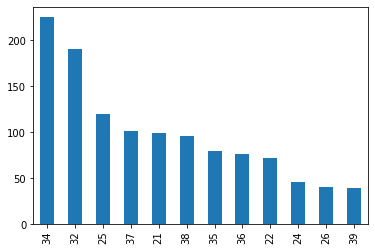

In [233]:
dataset = getDistanceConditioned(man_first_marriage[2020])
m = dataset["mLong_fCap"]

j = m[m['남편직업코드'] == 2]

j['남편지역코드'].value_counts().plot.bar()

# 전문직 남자 수 -> 충청남도 1위

<AxesSubplot:>

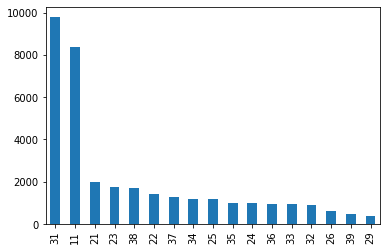

In [249]:
man_first_marriage[2020][man_first_marriage[2020]['남편직업코드'] == 2]['남편지역코드'].value_counts().plot(kind="bar")

### 여성 수도권 외 지역 - 직업 분포

<AxesSubplot:xlabel='아내직업코드,아내직업코드'>

c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\nexen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:15

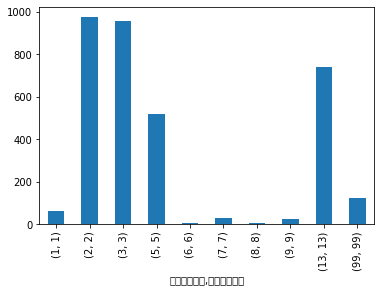

In [186]:
dataset = getDistanceConditioned(woman_first_marriage[2021])
mLong_fCap = dataset["mLong_fCap"]

mLong_fCap.groupby("아내직업코드")['아내직업코드'].value_counts().plot.bar()

# ~ 2017년 -> 무직/주부의 수 제일 높음
# 2018년 ~ -> 전문가/사무직의 수가 무직/주부 뛰어 넘음

<AxesSubplot:>

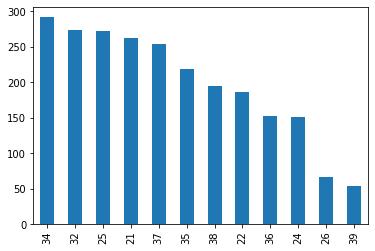

In [260]:
dataset = getDistanceConditioned(woman_first_marriage[2012])
m = dataset["mCap_fLong"]

j = m[m['아내직업코드'] == 2]

j['아내지역코드'].value_counts().plot.bar()

# 전문직 여자 수 -> 충청남도 / 강원도 엎치락 뒤치락

### 남편 - 아내 연령 변화 추이

In [187]:
for i in range(2010, 2022):
    man_first_marriage[i]['남편 - 아내 연령'] = man_first_marriage[i]['남편연령'] - man_first_marriage[i]['아내연령']

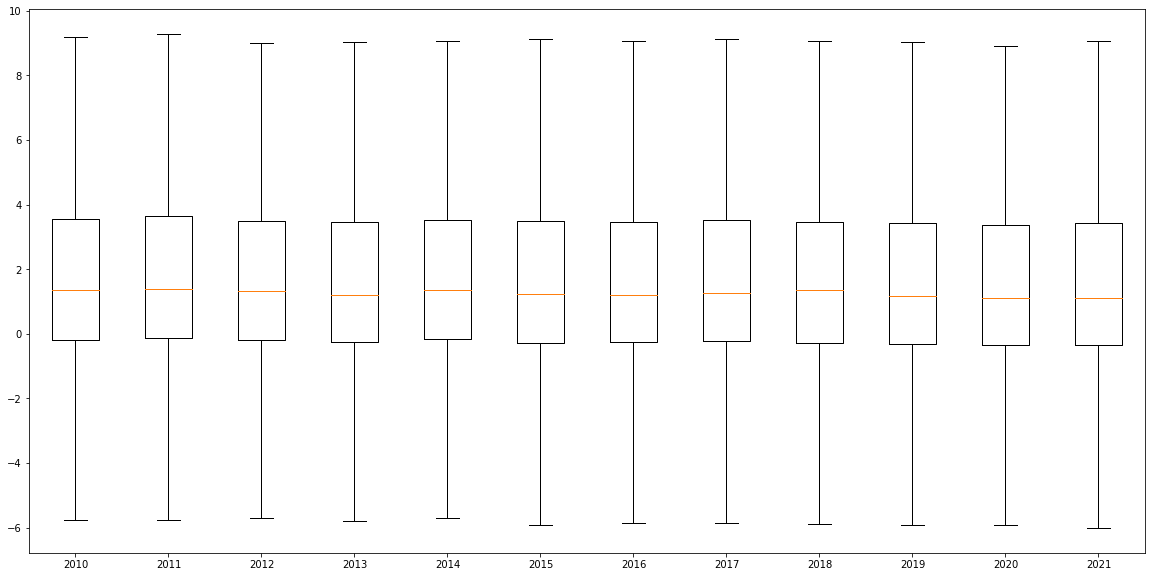

In [188]:
list_man = []

for i in range(2010, 2022):
    dataset = getDistanceConditioned(man_first_marriage[i])
    new_df = dataset["mLong_fCap"]
    list_man.append(new_df['남편 - 아내 연령'])

fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(list_man, showfliers=False)
ax.set_xticklabels(range(2010, 2022))

plt.show()

In [261]:
df[2010]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,남 - 여 교육 차
0,2010,12,24,38,38,2010,10,3,3,5,5,1,1,32.679,30.490,1.0,NaN,1.0,NaN,0
1,2010,12,28,31,11,2010,12,5,13,3,4,1,1,28.030,28.723,1.0,NaN,1.0,NaN,-1
2,2010,12,28,26,26,2010,9,3,13,5,5,1,1,29.400,28.556,1.0,NaN,1.0,NaN,0
3,2010,12,24,38,38,2010,10,3,13,5,5,1,1,29.671,26.150,1.0,NaN,1.0,NaN,0
4,2010,12,28,26,26,2010,9,7,2,5,5,1,1,28.991,28.526,1.0,NaN,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326602,2010,11,17,24,24,2010,10,3,3,5,5,1,1,34.728,30.904,1.0,NaN,1.0,NaN,0
326603,2010,8,5,11,11,2010,4,7,13,5,5,1,1,26.424,29.517,1.0,NaN,1.0,NaN,0
326604,2010,7,8,11,11,2010,7,3,3,5,5,1,1,30.361,29.597,1.0,NaN,1.0,NaN,0
326605,2010,7,8,11,11,2010,7,2,2,5,5,1,1,30.306,28.967,1.0,NaN,1.0,NaN,0
